In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Datasets/cleveland.csv')
cols = ['age', 'sex', 'chest_pain_type', 'rest_bp', 'cholestrol',
      'fasting_bp', 'rest_ecg', 'max_heartrate', 'exercise_induced_anigma', 
      'oldpeak_st', 'slope_st', 'major_vessels', 'thal', 'target']
df.columns=cols
print("Shape : ",df.shape)

Shape :  (302, 14)


In [2]:
df.head()

,age,sex,chest_pain_type,rest_bp,cholestrol,fasting_bp,rest_ecg,max_heartrate,exercise_induced_anigma,oldpeak_st,slope_st,major_vessels,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [3]:
print(df.dtypes)

age                          int64
sex                          int64
chest_pain_type              int64
rest_bp                      int64
cholestrol                   int64
fasting_bp                   int64
rest_ecg                     int64
max_heartrate                int64
exercise_induced_anigma      int64
oldpeak_st                 float64
slope_st                     int64
major_vessels              float64
thal                       float64
target                       int64
dtype: object


In [4]:
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
rest_bp                    0
cholestrol                 0
fasting_bp                 0
rest_ecg                   0
max_heartrate              0
exercise_induced_anigma    0
oldpeak_st                 0
slope_st                   0
major_vessels              4
thal                       2
target                     0
dtype: int64

In [5]:
df['major_vessels']=df['major_vessels'].interpolate()
df['thal']=df['thal'].interpolate(method='pad')
df['target']=df['target'].map({0:0,1:1,2:1,3:1,4:1})
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
rest_bp                    0
cholestrol                 0
fasting_bp                 0
rest_ecg                   0
max_heartrate              0
exercise_induced_anigma    0
oldpeak_st                 0
slope_st                   0
major_vessels              0
thal                       0
target                     0
dtype: int64

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)
print("Inputs shape ",x.shape)
print("Outputs shape ",y.shape)

Inputs shape  (302, 13)
Outputs shape  (302, 1)


In [7]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,random_state=2022,test_size=0.197)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(60, 13)
(242, 1)
(60, 1)


In [8]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
x_train=scaled.fit_transform(x_train)
x_test=scaled.transform(x_test)

In [9]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      0.84      0.89        37
           1       0.78      0.91      0.84        23

    accuracy                           0.87        60
   macro avg       0.86      0.88      0.86        60
weighted avg       0.88      0.87      0.87        60



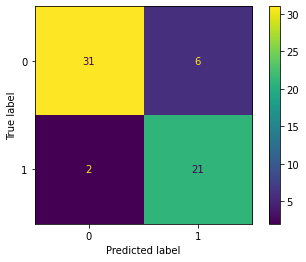

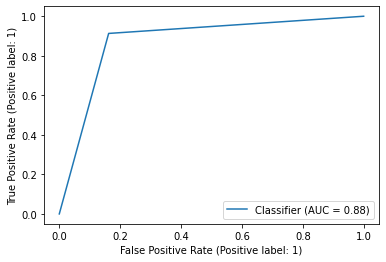

In [10]:
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay,ConfusionMatrixDisplay,plot_confusion_matrix

matrix_plot=confusion_matrix(y_test, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_plot,
                             display_labels=svc.classes_)
disp.plot()
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_predictions(y_test,y_pred)